# NOAA Weather - Results
### <i>Experiment 1.2 - Boosting Algorithms vs Random Forest</i> 
<hr>

In [1]:
###### importing dependencies #############################################
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
EXP_RESULT_PATH     = "persistence/experiment_1.2/results"
BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
BENCHMARK_TUNED_RESULTS = "{}/{}".format(EXP_RESULT_PATH, "tuned_benchmark_results.pkl")

DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_iter_results.pkl")

<a id='benchmark'></a>
## Benchmark Models 

<a id='benchmark_rf_default'></a>
### Random Forest - Default Hyperparameters 

In [2]:
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

<a id='benchmark_rf_default_eval'></a>
####  RF Default Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [3]:
print("Performance metrics for RF benchmark model with default hyperparameters")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

Performance metrics for RF benchmark model with default hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.742,0.589,0.78,0.78,0.738,0.657


<a id='benchmark_rf_default_stats'></a>
#### RF Default Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.742318,0.588759,0.780177,0.780177,0.737618,0.656654
std,29.011492,0.005072,0.005696,0.002122,0.002122,0.002490,0.003710
min,0.000000,0.728814,0.574150,0.775694,0.775694,0.732144,0.648618
25%,24.750000,0.739403,0.585350,0.778774,0.778774,0.735690,0.653771
50%,49.500000,0.742419,0.589083,0.780107,0.780107,0.737622,0.656908
75%,74.250000,0.745346,0.592688,0.781577,0.781577,0.739166,0.659039
max,99.000000,0.754564,0.604016,0.785255,0.785255,0.744101,0.666477


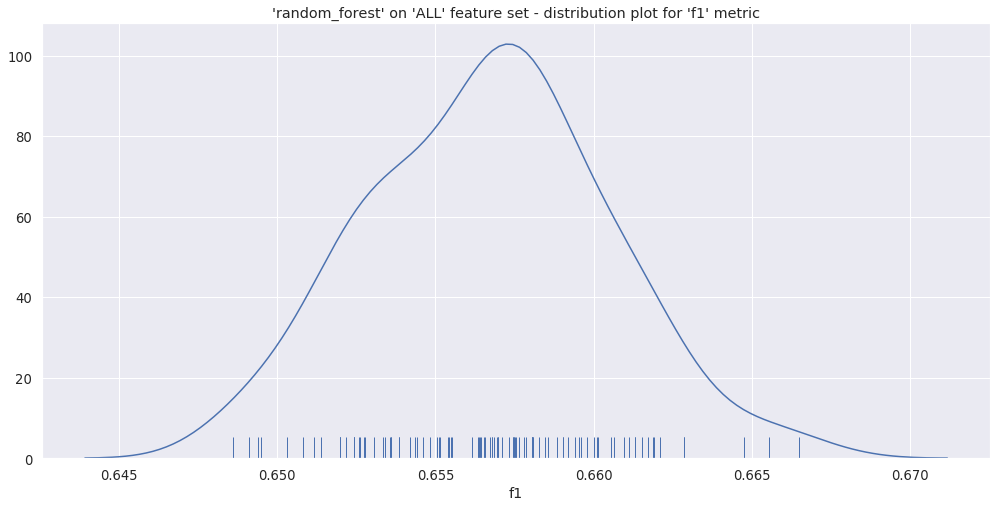

In [4]:
display_metrics_stats(benchmark_results)
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

<a id='benchmark_rf_default_matrix'></a>
####  RF Default Hyperparameters - Confusion Matrix

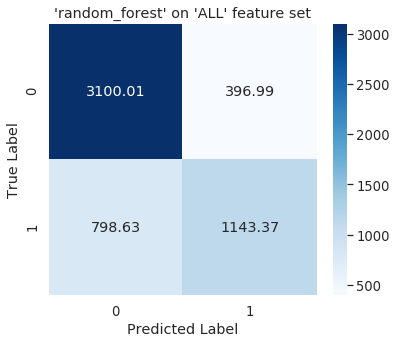

In [5]:
plot_result_matrices(benchmark_results, figsize=(6,5))

### RF - Tuned Hyperparameters 

In [6]:
benchmark_tuned_results = read_pickle(BENCHMARK_TUNED_RESULTS)

####  RF Tuned Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [7]:
print("Performance metrics for RF benchmark model with tuned hyperparameters")
benchmark_tuned_metrics_df = results_table(benchmark_tuned_results)
display(benchmark_tuned_metrics_df)

Performance metrics for RF benchmark model with tuned hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.748,0.595,0.784,0.784,0.742,0.662


#### RF Tuned Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.747707,0.594650,0.783624,0.783624,0.741609,0.662447
std,29.011492,0.002909,0.002816,0.001313,0.001313,0.001459,0.002127
min,0.000000,0.741811,0.588054,0.779923,0.779923,0.737264,0.656133
25%,24.750000,0.745419,0.592688,0.782864,0.782864,0.740782,0.661254
50%,49.500000,0.747978,0.594748,0.783692,0.783692,0.741741,0.662645
75%,74.250000,0.749716,0.596421,0.784519,0.784519,0.742470,0.663796
max,99.000000,0.755715,0.600927,0.786909,0.786909,0.744729,0.666858


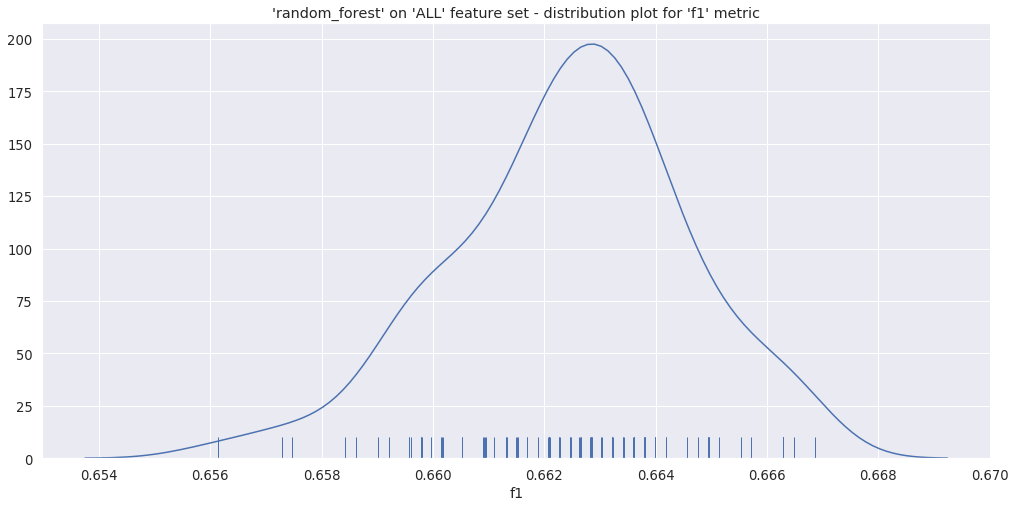

In [8]:
display_metrics_stats(benchmark_tuned_results)
plot_metric_dist(benchmark_tuned_results, "f1", figsize=(17,8))

####  RF Tuned Hyperparameters - Confusion Matrix

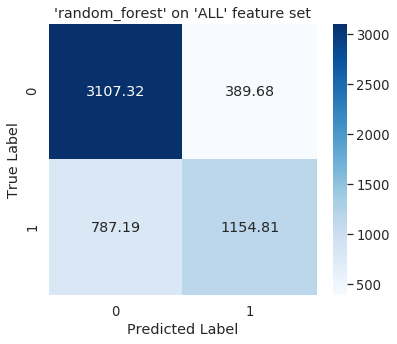

In [9]:
plot_result_matrices(benchmark_tuned_results, figsize=(6,5))

#### RF Tuned Hyperparameters - Hyperparameters

In [10]:
print_model_params(benchmark_tuned_results)

Parameters used for 'random_forest' on 'ALL' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': 0.7803639907513293,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 950,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


## Boosting Algorithms
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/)

### Boosting Algorithms - Default Hyperparameters

In [11]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>`

In [12]:
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.729,0.594,0.776,0.776,0.736,0.655
1,light_boost_ALL,0.735,0.617,0.784,0.784,0.747,0.671
2,cat_boost_ALL,0.748,0.630,0.792,0.792,0.756,0.684


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
2,cat_boost_ALL,0.748,0.630,0.792,0.792,0.756,0.684
1,light_boost_ALL,0.735,0.617,0.784,0.784,0.747,0.671
0,xg_boost_ALL,0.729,0.594,0.776,0.776,0.736,0.655


#### Boosting Default Hyperparameters - Confusion Matrices

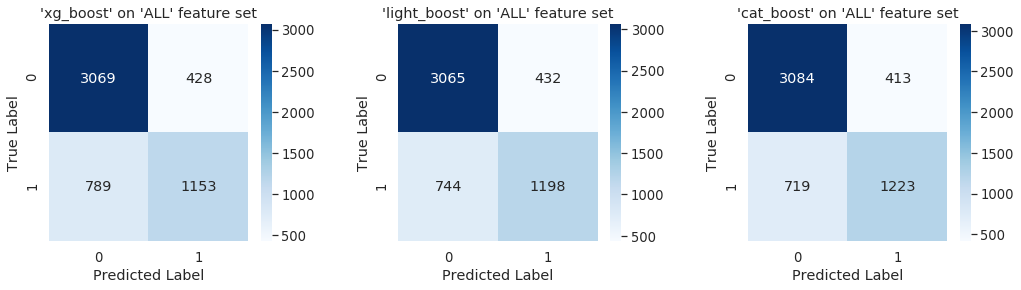

In [13]:
plot_result_matrices(default_results, figsize=(17,4), columns=3)

#### Boosting Default Hyperparameters - F1 Results over Test Span

In [14]:
# in this plot we also display benchmark model
# tmp_results = {**benchmark_results, **default_results}
# elliptic_time_indexed_results(default_results)

### Boosting Algorithms - Tuned Hyperparameters 

In [15]:
tuned_results = read_pickle(TUNED_RESULTS)

#### Boosting Tuned Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [21]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# # sorted by f1 score/home/delinvas/repos/aml-crypto-graph/src/cryptoaml/datareader/_elliptic_dr.py
# print("Performance metrics for tuned boosting models sorted by f1-score")
# display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.748,0.615,0.789,0.789,0.750,0.675
1,light_boost_ALL,0.755,0.643,0.798,0.798,0.763,0.694
2,cat_boost_ALL,0.760,0.601,0.790,0.790,0.748,0.671


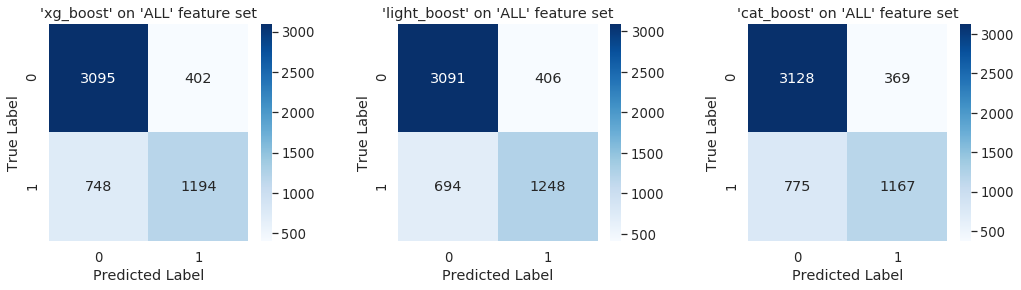

In [17]:
plot_result_matrices(tuned_results, figsize=(17,4), columns=3)

#### Boosting Tuned Hyperparameters - Evaluation Statistics


In [20]:
# print(tuned_results)
display_metrics_stats(tuned_results)

'xg_boost' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,49.500000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01
std,29.011492,7.810713e-16,4.463264e-16,2.231632e-16,2.231632e-16,1.115816e-15,3.347448e-16
min,0.000000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01
25%,24.750000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01
50%,49.500000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01
75%,74.250000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01
max,99.000000,7.481203e-01,6.148301e-01,7.885641e-01,7.885641e-01,7.499372e-01,6.749576e-01


'light_boost' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,49.500000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01
std,29.011492,8.926529e-16,1.227398e-15,1.115816e-16,1.115816e-16,3.347448e-16,1.227398e-15
min,0.000000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01
25%,24.750000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01
50%,49.500000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01
75%,74.250000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01
max,99.000000,7.545345e-01,6.426365e-01,7.977569e-01,7.977569e-01,7.632685e-01,6.941046e-01


'cat_boost' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,49.500000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01
std,29.011492,0.000000,0.000000,8.926529e-16,8.926529e-16,1.115816e-16,2.231632e-16
min,0.000000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01
25%,24.750000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01
50%,49.500000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01
75%,74.250000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01
max,99.000000,0.759766,0.600927,7.896672e-01,7.896672e-01,7.477039e-01,6.710753e-01


#### Boosting Tuned Hyperparameters - Hyperparameters

In [18]:
print_model_params(tuned_results)

Parameters used for 'xg_boost' on 'ALL' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.8259357777868539,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9390481435192746,
    'gamma': 9.856689719822213e-05,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.10278359593536876,
    'max_delta_step': 0,
    'max_depth': 3,
    'min_child_weight': 0.23006847451636644,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 686,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0.9698309151946589,
    'reg_lambda': 3.6482620406500425e-05,
    'scale_pos_weight': 1,
    'subsample': 0.9669853429860304,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'ALL' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.9042782299701083,
    'importance_type': 'split',
    'learning_rate': 0.00942139530205555,
    'max_depth': -1,
    'min_child_samples': 92,
    'min_child_weight': 0.2509419055407807,
    'min_split_gain': 0.0,
    'n_estimators': 970,
    'n_jobs': -1,
    'num_leaves': 247,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.07504697557719497,
    'reg_lambda': 0.007102258113567796,
    'silent': True,
    'subsample': 0.6496983898551796,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'cat_boost' on 'ALL' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 9,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 2201,
    'l2_leaf_reg': 5.976006031036377,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 4,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.029553746804594994,
    'loss_function': 'Logloss',
    'max_leaves': 512,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 18,
    'rsm': 0.2849999964237213,
    'sampling_frequency': 'PerTree'

In [34]:
import seaborn as sns
display(tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["f1"].values)

# ax = sns.boxplot(x="day", y="total_bill", data=tips)

array([0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576, 0.6749576,
       0.6749576, 0.6749576, 0.6749576, 0.6749576, 